# Final Project Submission - Movie Suggestions for New Microsoft Studio

Please fill out:
* Student name: Elliot Teeman
* Student pace: self paced
* Scheduled project review date/time: TBD 
* Instructor name: Joe Comeaux



## Pulling Data for Initial Review
### Importing Libraries

Libraries imported for visualizations and SQL

In [11]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Dataset

This dataset was chosen for the inclusion of budget and revenue data.

In [12]:
tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

tn_df.info()
tn_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Filtering and Converting Data

Converting date, budget and gross into usuable numbers and filtering the list to a more manageable sample. 

Movie population for review will be from dates 2010-2019 and a worldwide gross over $20mil. 
This makes a movie population close to 1200.

In [13]:
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace('$', '')
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(',', '').astype(float)

tn_df['production_budget'] = tn_df['production_budget'].str.replace('$', '')
tn_df['production_budget'] = tn_df['production_budget'].str.replace(',', '').astype(float)

tn_df['release_date'] = tn_df['release_date'].str[7:12:1].astype(int)

tn_df['profit'] = tn_df['worldwide_gross'] - tn_df['production_budget']

tn_df = tn_df[tn_df['worldwide_gross'] > 20000000]
tn_df = tn_df[tn_df['release_date'] > 2009]

tn_df.info()
tn_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191 entries, 1 to 5679
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1191 non-null   int64  
 1   release_date       1191 non-null   int32  
 2   movie              1191 non-null   object 
 3   production_budget  1191 non-null   float64
 4   domestic_gross     1191 non-null   object 
 5   worldwide_gross    1191 non-null   float64
 6   profit             1191 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(2)
memory usage: 69.8+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,6.350639e+08
2,3,2019,Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,-2.002376e+08
3,4,2015,Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,1.072414e+09
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,9.997217e+08
5,6,2015,Star Wars Ep. VII: The Force Awakens,306000000.0,"$936,662,225",2.053311e+09,1.747311e+09


### Importing SQL Data 

I will be combining this SQL data to the previous dataset to include Genre information

In [20]:
conn = sqlite3.Connection('zippedData/im.db') #connection line to explore imdb SQL

In [26]:

q = """
SELECT primary_title, start_year, genres
FROM movie_basics

;"""
sql_bas_df = pd.read_sql(q, conn)

sql_bas_df.info()
sql_bas_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   primary_title  146144 non-null  object
 1   start_year     146144 non-null  int64 
 2   genres         140736 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.3+ MB


,primary_title,start_year,genres
0,Sunghursh,2013,"Action,Crime,Drama"
1,One Day Before the Rainy Season,2019,"Biography,Drama"
2,The Other Side of the Wind,2018,Drama
3,Sabse Bada Sukh,2018,"Comedy,Drama"
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"


In [30]:
conn.close() #Close SQL connection

### Data Cleaning

Combined SQL data with existing dataframe. Many movies did not link with the SQL data. Deciding to export file for some manual cleaning.

In [29]:

combined_df = tn_df.merge(sql_bas_df, how='left', left_on=['movie','release_date'], right_on=['primary_title','start_year'])

combined_df.info()

combined_df.to_csv('zippedData/combined.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217 entries, 0 to 1216
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1217 non-null   int64  
 1   release_date       1217 non-null   int32  
 2   movie              1217 non-null   object 
 3   production_budget  1217 non-null   float64
 4   domestic_gross     1217 non-null   object 
 5   worldwide_gross    1217 non-null   float64
 6   profit             1217 non-null   float64
 7   primary_title      997 non-null    object 
 8   start_year         997 non-null    float64
 9   genres             995 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(4)
memory usage: 99.8+ KB


#### Combined SQL with Cleaned Data

In [31]:
cleaned_df = pd.read_csv('zippedData/cleaned_tn.csv')

combined2_df = cleaned_df.merge(sql_bas_df, how='left', left_on=['movie','release_date'], right_on=['primary_title','start_year'])

combined2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 0 to 1188
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1189 non-null   int64  
 1   release_date       1189 non-null   int64  
 2   movie              1189 non-null   object 
 3   production_budget  1189 non-null   int64  
 4   domestic_gross     1189 non-null   object 
 5   worldwide_gross    1189 non-null   int64  
 6   profit             1189 non-null   int64  
 7   profit_percentage  1189 non-null   float64
 8   primary_title      1186 non-null   object 
 9   start_year         1186 non-null   float64
 10  genres             1184 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 111.5+ KB


### Deciding How to Group Genres

The cell below shows that there was currently over 180 groupings of genre types in dataset. To keep this at a high-level,
I decided to group movies into 9 top-level genres for comparisons.

<b>Genres:</b><br>
*Action/Adventure*     - Examples include Superhero movies, Star Wars, etc. <br>
*Action/Thriller*      - Movies like James Bond, Mission Impossible, etc. <br>
*Biography/Historical* - Based on real people/events, could have elements of other genres.<br>
*Comedy*               - Standard comedic movies, with little genre crossover.<br>
*Crime/Mystery*        - Heist/Drug movies and Police/Detective/Lawyer themed movies.<br>
*Drama*                - High Drama movies with little genre crossover.<br>
*Dramedy*              - Movies that cover serious topics with humerous elements.<br>
*Family/Animation*     - Family friendly movies, typically aimed at younger audiences.<br>
*Horror*               - Movies like Saw, The Quiet Place, The Purge, etc.<br>


In [36]:

combined2_df.to_csv('zippedData/merged.csv', index = False) #Exported for cleaning of Genre groups

combined2_df['genres'].value_counts()


Adventure,Animation,Comedy    77
Action,Adventure,Sci-Fi       55
Comedy                        42
Comedy,Drama,Romance          37
Action,Adventure,Fantasy      37
                              ..
Adventure,Horror,Mystery       1
Drama,Thriller,War             1
Drama,History                  1
Action,Drama,War               1
Action,Comedy                  1
Name: genres, Length: 187, dtype: int64

#### Genre Groupings of Final Dataset 

In [37]:
final_df = pd.read_csv('zippedData/final.csv')

final_df['genres'].value_counts()

Family/Animation        182
Drama                   159
Action/Adventure        157
Comedy                  143
Dramedy                 127
Horror                  114
Action/Thriller          93
Crime/Mystery            92
Biography/Historical     88
Name: genres, dtype: int64

## Analysis and Visualizations

In the visualizations below, we will review overall profit percentage by genre, data sets to show budget and absolute profit by genre and viewing trends of each genre for every year in the dataset.

### Bar Chart Showing Profit % by Genre

Horror and Dramatic movies show the highest generel profit margin base on the chart below.

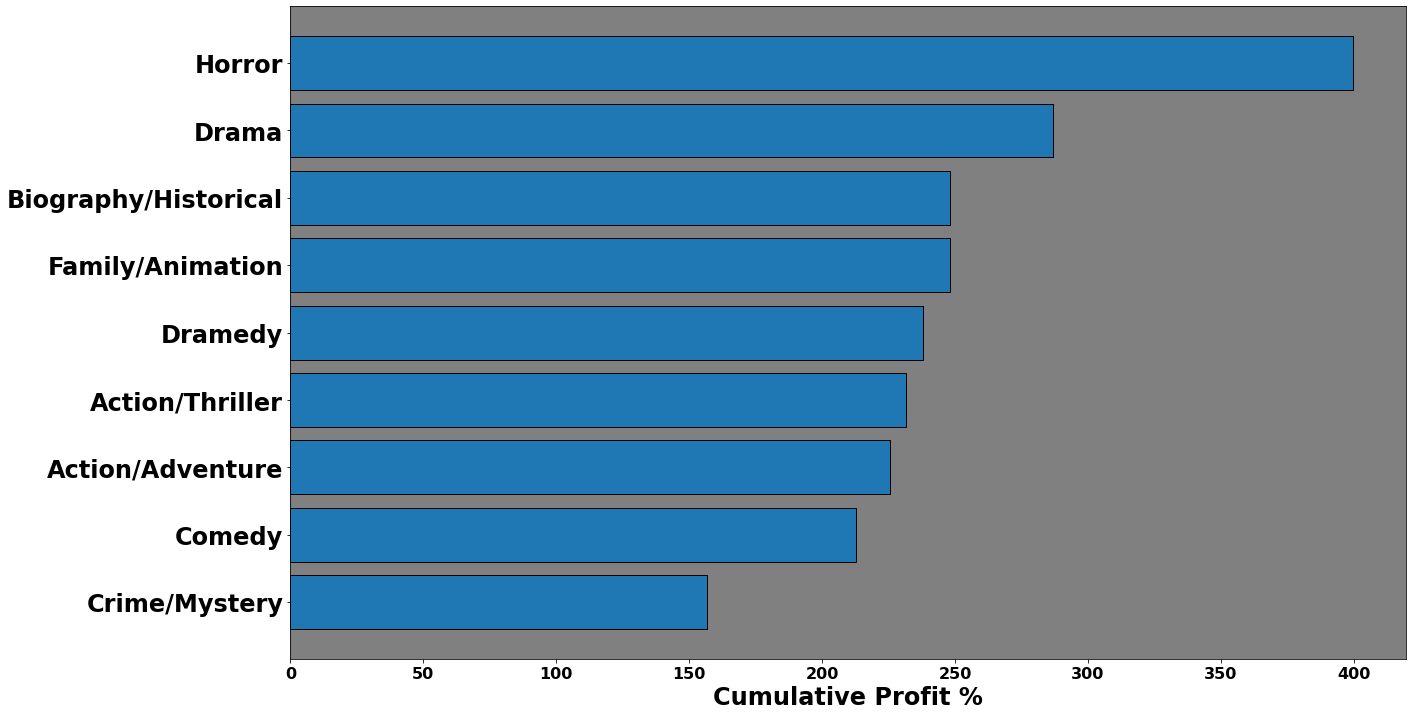

<Figure size 432x288 with 0 Axes>

In [38]:

bygenre = final_df.groupby(['genres']).sum()
bygenre['profit_percentage'] = (bygenre['profit'] / bygenre['production_budget']) * 100

bygenre = bygenre.sort_values(by=['profit_percentage'])

x = bygenre.index  #Movie genre groups
y = bygenre['profit_percentage'] #cumulative percentage of profit

fig,ax = plt.subplots(figsize=(20, 12),facecolor='white')
ax.set_facecolor('gray')

plt.barh(x,y,edgecolor= 'black')
plt.xlabel('Cumulative Profit %', fontweight= 'bold', fontsize= 24)

plt.yticks(fontweight= 'bold', fontsize= 24)
plt.xticks(fontweight= 'bold', fontsize= 16)
plt.show()

plt.savefig('tot_percentage')

### Box Plots Showing Distribution of Budget and Profit by Genre

Action movies and Family/Animation have the highest budgets and profits per the plots below.

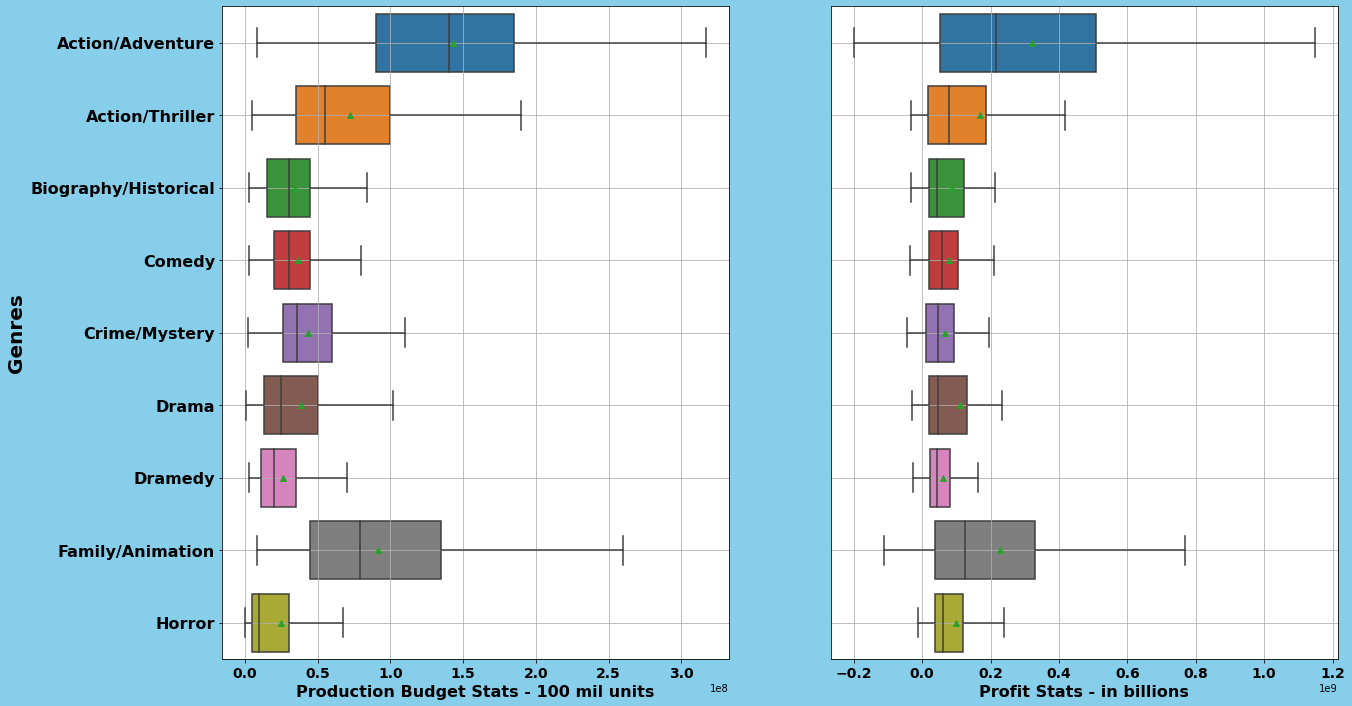

In [42]:
fig,axes = plt.subplots(1,2,figsize=(20, 12),facecolor= 'skyblue')

sns.boxplot(data=final_df, x= 'profit', y= 'genres', orient= 'h',showfliers=False,showmeans=True)
plt.xlabel("Profit Stats - in billions", fontweight= 'bold', fontsize= 16)
plt.grid()
plt.xticks(fontweight= 'bold',fontsize= 14)
plt.tick_params(left=False,labelleft = False)
plt.ylabel("")
plt.subplot(1,2,1)

sns.boxplot(data=final_df, x= 'production_budget', y= 'genres', orient= 'h',showfliers=False,showmeans=True)
plt.xlabel("Production Budget Stats - 100 mil units", fontweight= 'bold', fontsize= 16)
plt.grid()
plt.xticks(fontweight= 'bold',fontsize= 14)
plt.ylabel("Genres", fontweight= 'bold', fontsize= 20)
plt.yticks(fontweight= 'bold',fontsize= 16)

plt.savefig('box_plots')

### Line Plots to Show Viewing Trends by Genre

In [47]:
total_world = final_df.groupby(['release_date']).sum()

genre_table = pd.pivot_table(final_df, values='worldwide_gross', index='release_date',
                    columns='genres', aggfunc=np.sum)

for i in genre_table.columns:
    genre_table[i] = ((genre_table[i])/(total_world['worldwide_gross']) * 100)
    

### Viewing trends have increased for Action/Adventure, Biography/Historical, Family/Animation and Horror

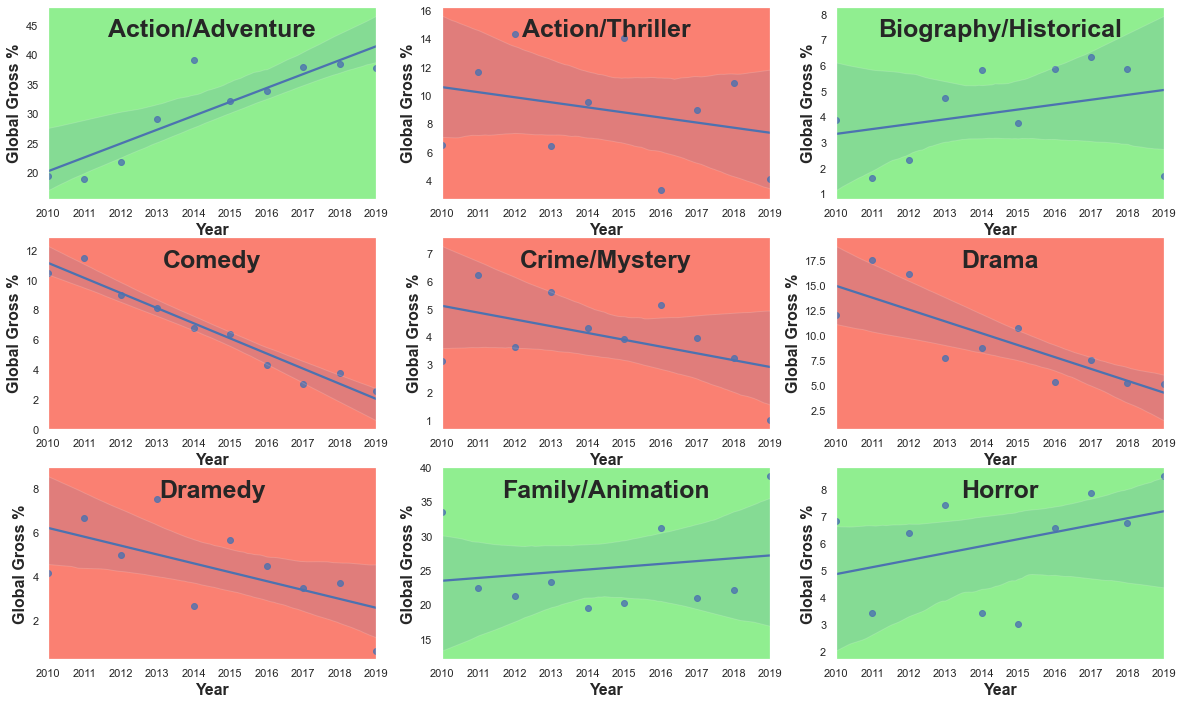

In [49]:

fig,axes = plt.subplots(figsize=(20, 12))

counter = 0                        
                        
for i in genre_table.columns:
    counter += 1
    plt.subplot(3,3,counter)
    ax = sns.regplot(x=genre_table.index, y=genre_table[i])
    sns.set(rc={'axes.facecolor':'lightgreen', 'figure.facecolor':'white'})
    plt.xlabel("Year", fontweight= 'bold', fontsize= 16)
    plt.ylabel("Global Gross %", fontweight= 'bold', fontsize= 16)
    plt.grid(False)
    ax.set_title(i, fontweight= 'bold', fontsize= 25, pad=-30)
    
    if counter in [1,3,4,5,6]:
        sns.set(rc={'axes.facecolor':'salmon', 'figure.facecolor':'white'})
    
plt.savefig('viewing_trends')


# Conclusions:

## I would advise to start with large portion of budget in lower risk genres such as Historical Drama, Family and Horror movies. 

## The portion of the budget that is can be considered higher risk should focus on trying to create charaters/worlds that can be franchised in the Action genres.